# TEXT CLUSTERING USING TF-IDF VECTORIZER

###### Step 1: Import the libraries


In [10]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

###### Step 2: Load the data

In [11]:
df = pd.read_csv('customer_complaints_1.csv')

###### Step 4: Vectorize the dataset

In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

###### Step 5: Perform clustering


In [18]:
# Define the number of clusters
k = 3

# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))


Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [19]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 day
 on
 failure
 reps
 dropping
 relying
 outages
 unplanned
 totally
 rearranging

Cluster 1:
 my
 the
 service
 was
 to
 that
 is
 comcast
 am
 rep

Cluster 2:
 the
 to
 and
 for
 you
 it
 they
 is
 have
 was



###### Step 5: Evaluate results

In [20]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.7368421052631579


IndexError: list index out of range

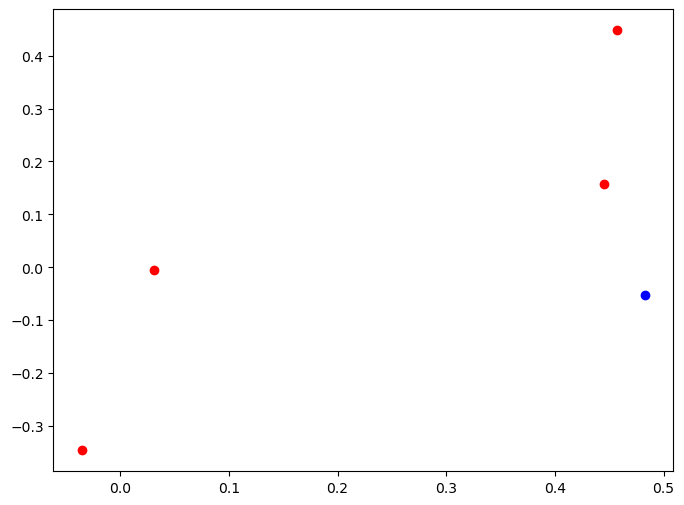

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()